# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filepath = "C:\\Users\\Nikolas Theol\\AppData\\Local\\Programs\\Python\\Python38\\Scripts\\azureai-2021-team4\\data"
file = 'listings.csv'
total_filepath = filepath + "\\" + file

raw = pd.read_csv(total_filepath)

In [3]:
df = pd.DataFrame(data = raw)

In [4]:
df.host_since = pd.to_datetime(df.host_since) 

In [5]:
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('float')

## Price distribution per neighbourhood

In [6]:
price_neighbour = df.groupby('neighbourhood_cleansed').mean()
price_neighbour.head()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
neighbourhood_cleansed,,,,,,,,,,,,,,,,,,,,,
1Ο ΝΕΚΡΟΤΑΦΕΙΟ,1.956614e+07,2.021022e+13,6.362591e+07,16.555556,16.555556,NaN,37.963409,23.738688,4.277778,NaN,...,9.612903,9.967742,10.000000,9.645161,9.709677,8.166667,6.861111,1.305556,0.000000,1.625161
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,2.942776e+07,2.021022e+13,1.580122e+08,4.360000,4.360000,NaN,38.019591,23.729273,3.240000,NaN,...,9.473684,9.894737,9.894737,9.631579,9.421053,3.840000,2.320000,1.520000,0.000000,0.721000
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,3.060008e+07,2.021022e+13,1.413120e+08,17.193103,17.193103,NaN,37.986666,23.723129,3.950000,NaN,...,9.618834,9.789238,9.773543,8.789238,9.464126,10.370690,9.034483,1.279310,0.034483,1.376607
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,3.057400e+07,2.021022e+13,1.584390e+08,10.029851,10.029851,NaN,38.007874,23.729349,3.746269,NaN,...,9.540000,9.920000,9.880000,9.380000,9.640000,6.179104,6.029851,0.149254,0.000000,1.270196
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,2.466531e+07,2.021022e+13,1.279525e+08,2.533333,2.533333,NaN,37.989996,23.711631,3.400000,NaN,...,9.755102,9.816327,9.857143,9.081633,9.653061,1.900000,1.800000,0.083333,0.016667,1.266200


In [7]:
categories = list(df['neighbourhood_cleansed'].unique())
height = price_neighbour.price

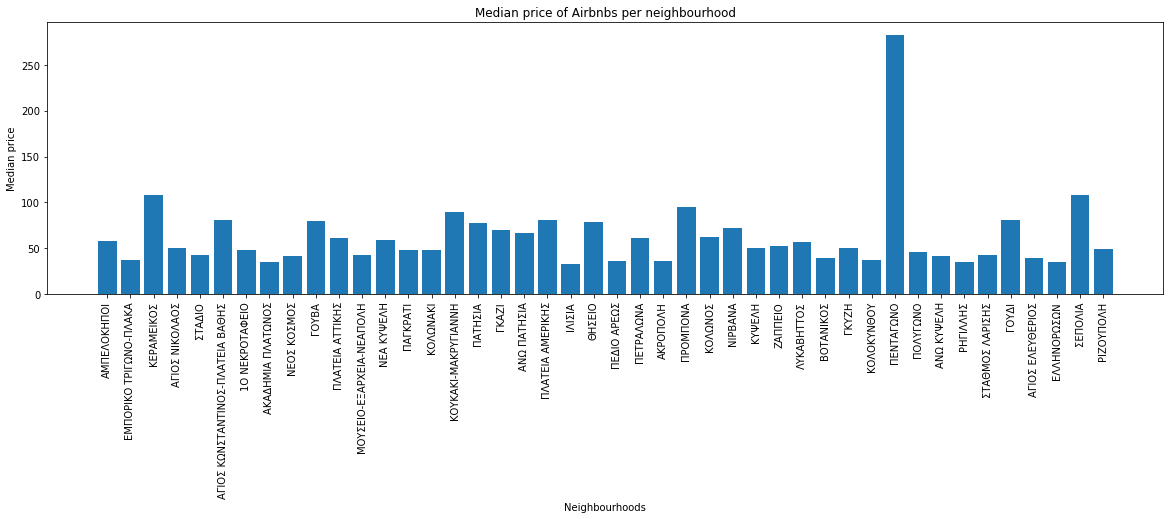

In [8]:
plt.figure(figsize=(20,5))

y_pos = range(len(categories))

plt.rcParams['figure.dpi'] = 360
plt.title("Median price of Airbnbs per neighbourhood")
plt.ylabel("Median price")
plt.xlabel("Neighbourhoods")

plt.bar(categories,height )
plt.xticks(y_pos, categories, rotation=90)
plt.show()

## Price distribution per number of guests

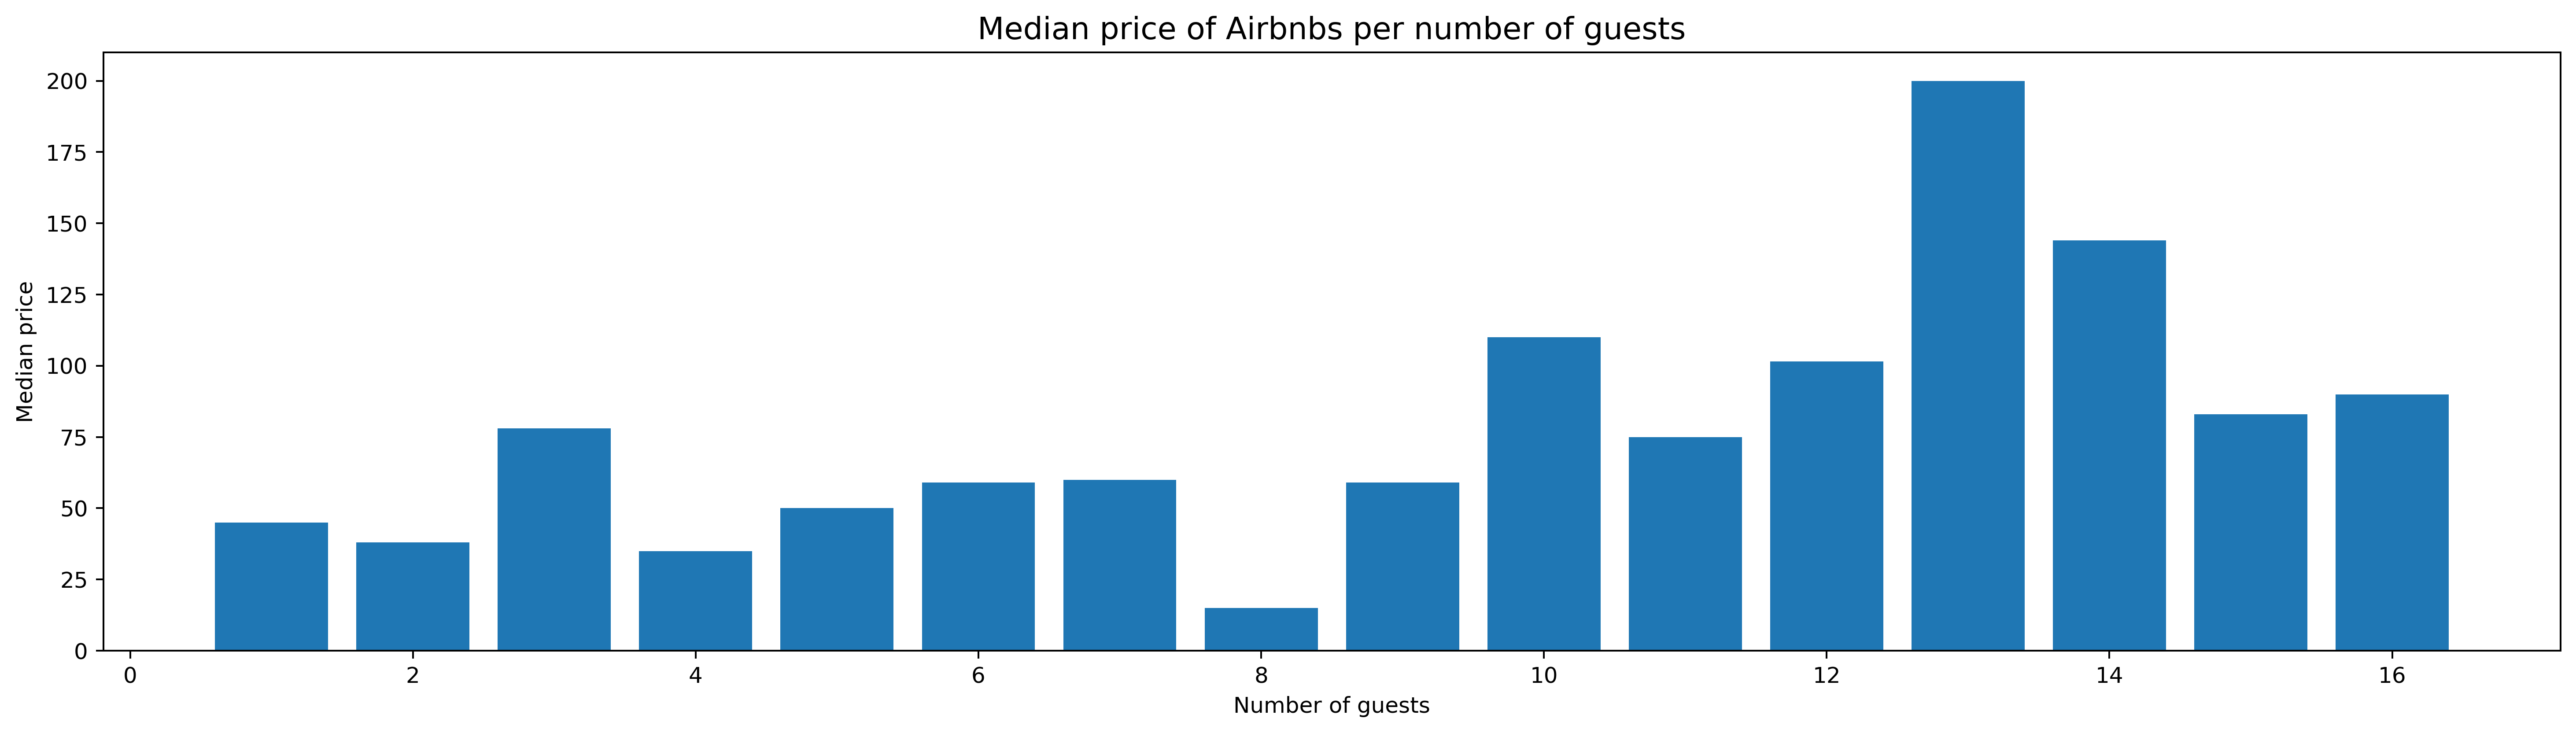

In [9]:
plt.figure(figsize=(20,5))
accommodates = df.groupby('accommodates').median()

plt.rcParams['figure.dpi'] = 360
plt.bar(list(df['accommodates'].unique()),accommodates.price)
plt.title('Median price of Airbnbs per number of guests', fontsize=14)
plt.xlabel('Number of guests')
plt.ylabel('Median price')

plt.show()

## Distribution of hosts joining Airbnb per year

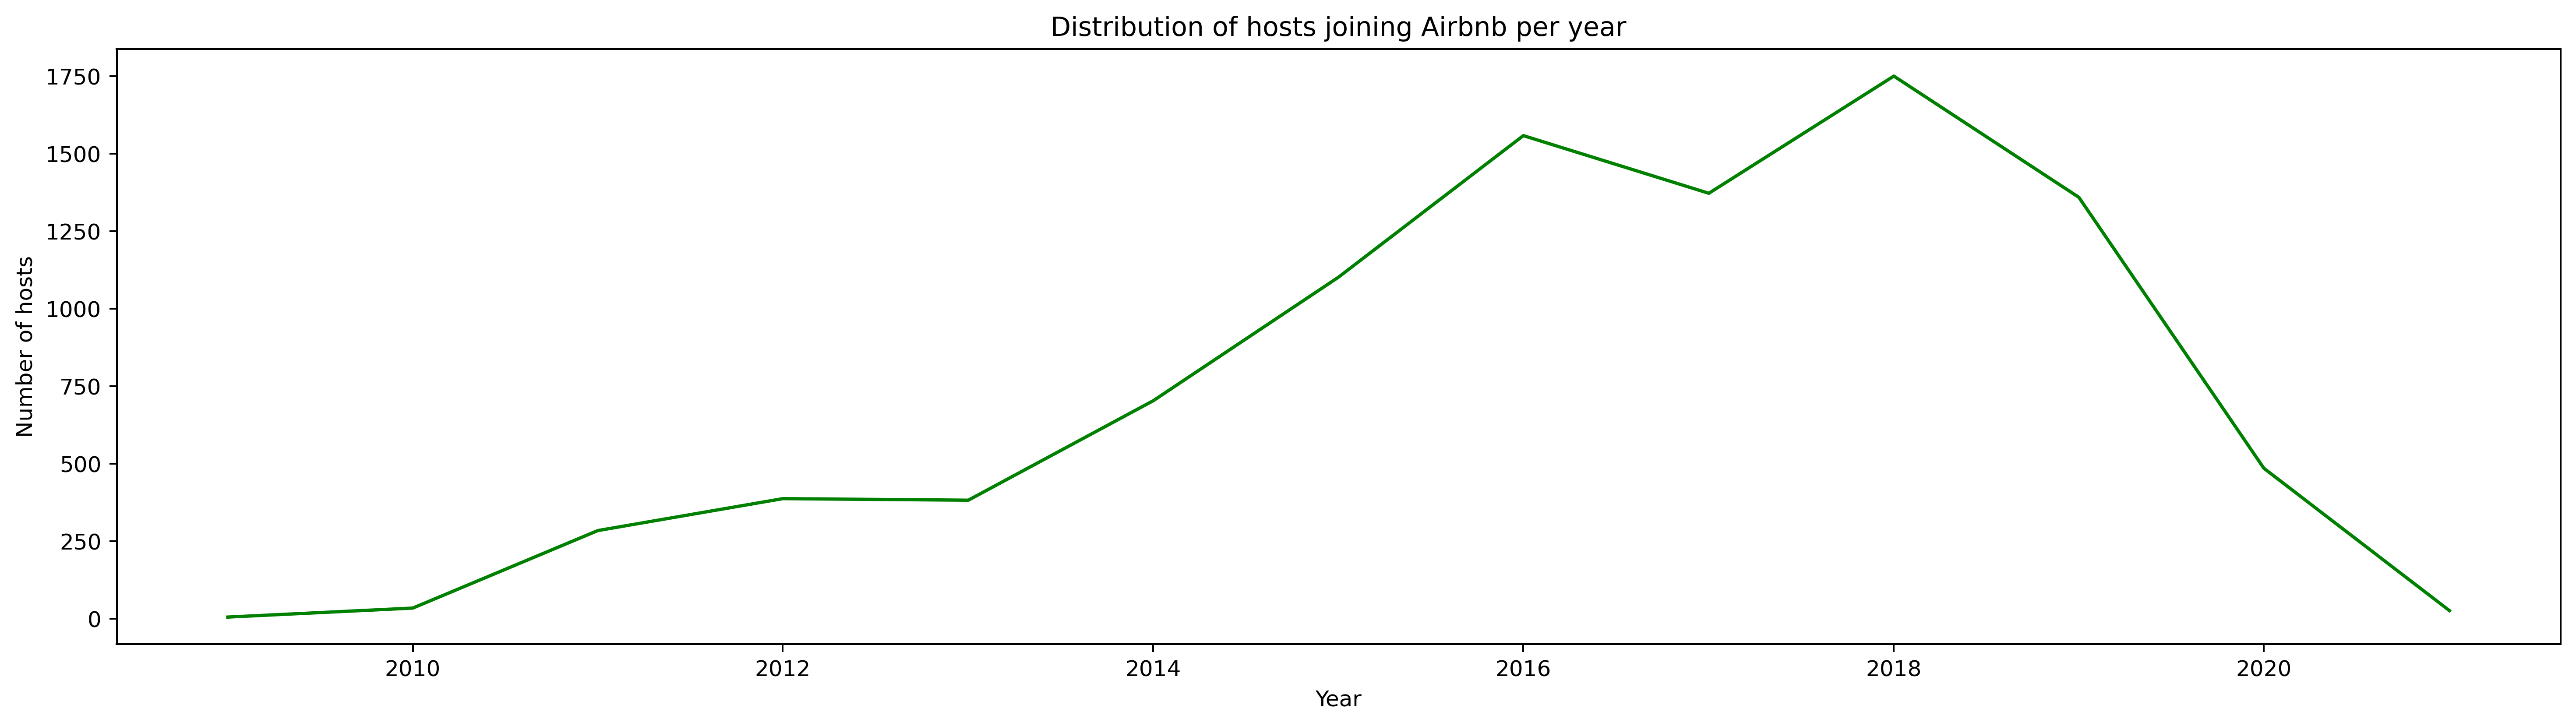

In [10]:
plt.figure(figsize=(20,5))
plt.rcParams['figure.dpi'] = 360
plt.ylabel("Number of hosts")
plt.xlabel("Year")
plt.plot(df.set_index('host_since').resample('YS').size(), color = 'green')
plt.title('Distribution of hosts joining Airbnb per year')

plt.show()

## Review scores ratings

In [11]:
rating = df['review_scores_rating'].value_counts().sort_index(ascending = False)

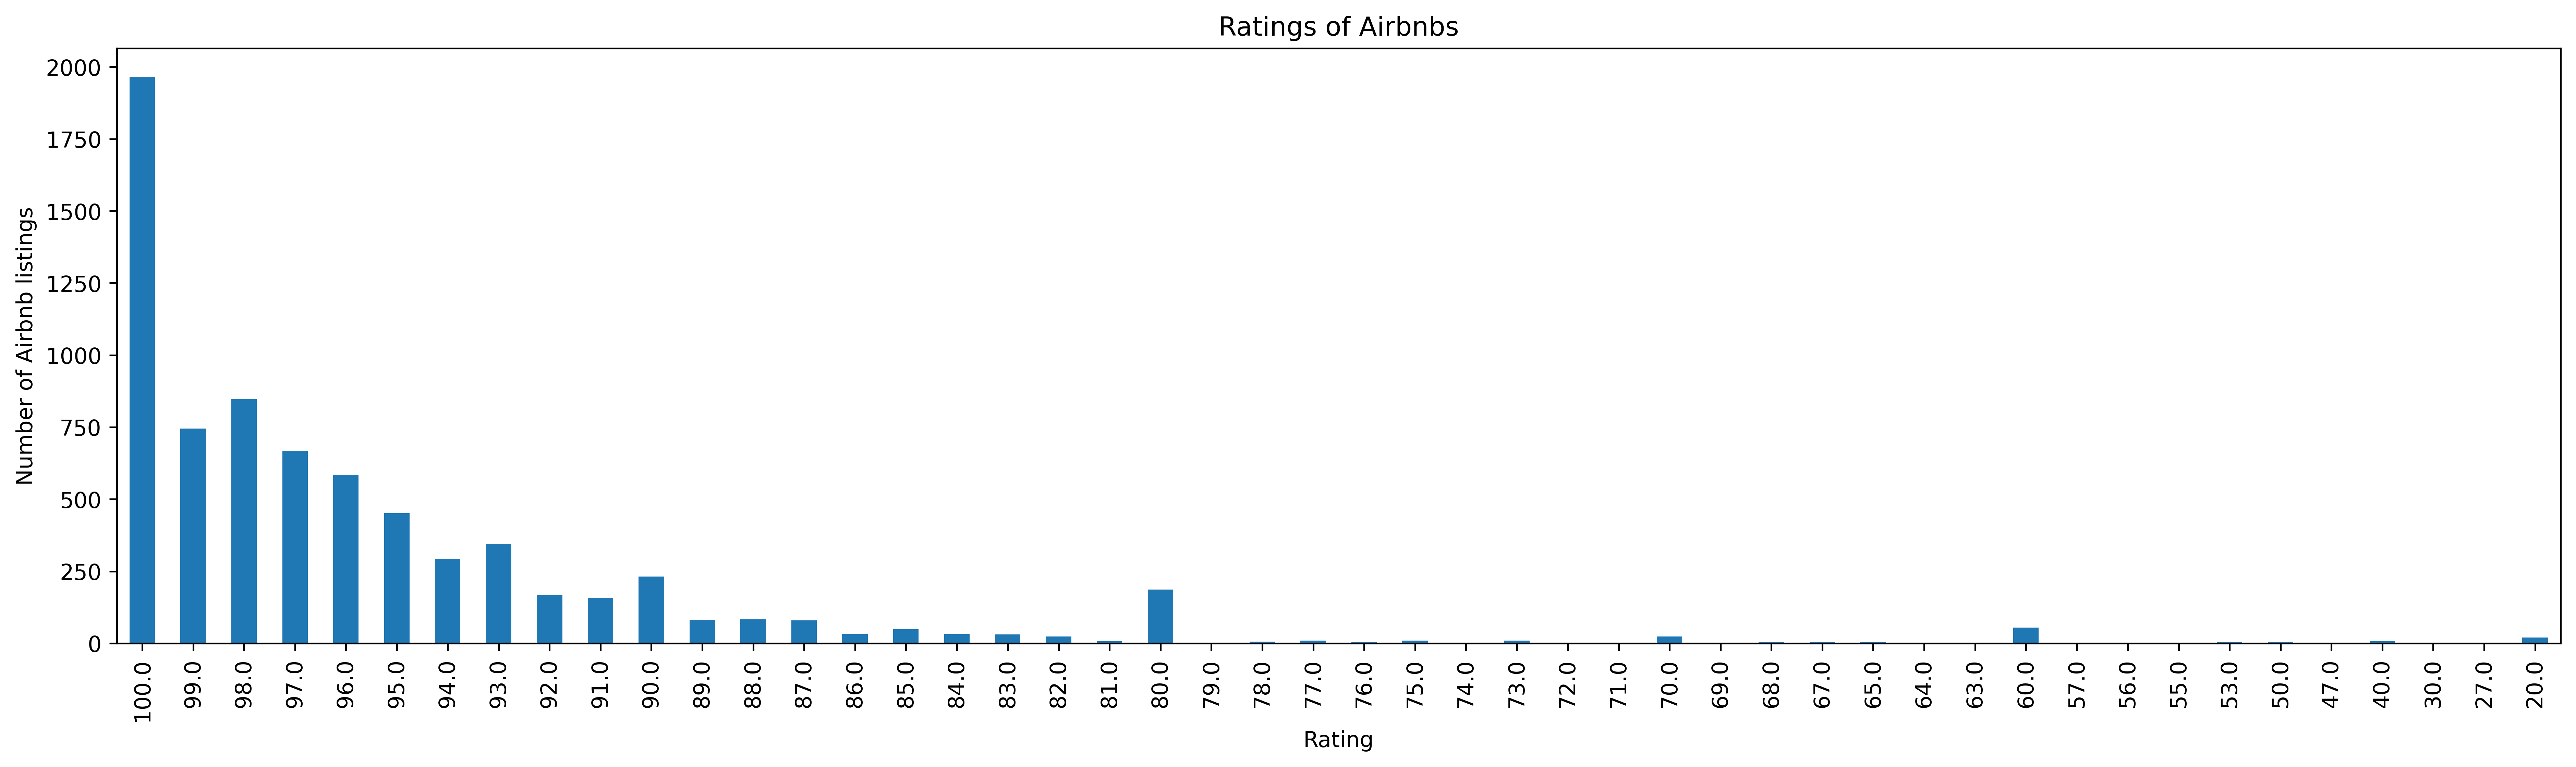

In [12]:
figsize = (20,5)

plt.rcParams['figure.dpi'] = 460
plt.title("Ratings of Airbnbs")
plt.ylabel("Number of Airbnb listings")
plt.xlabel("Rating")

rating.plot.bar(figsize = (20,5))

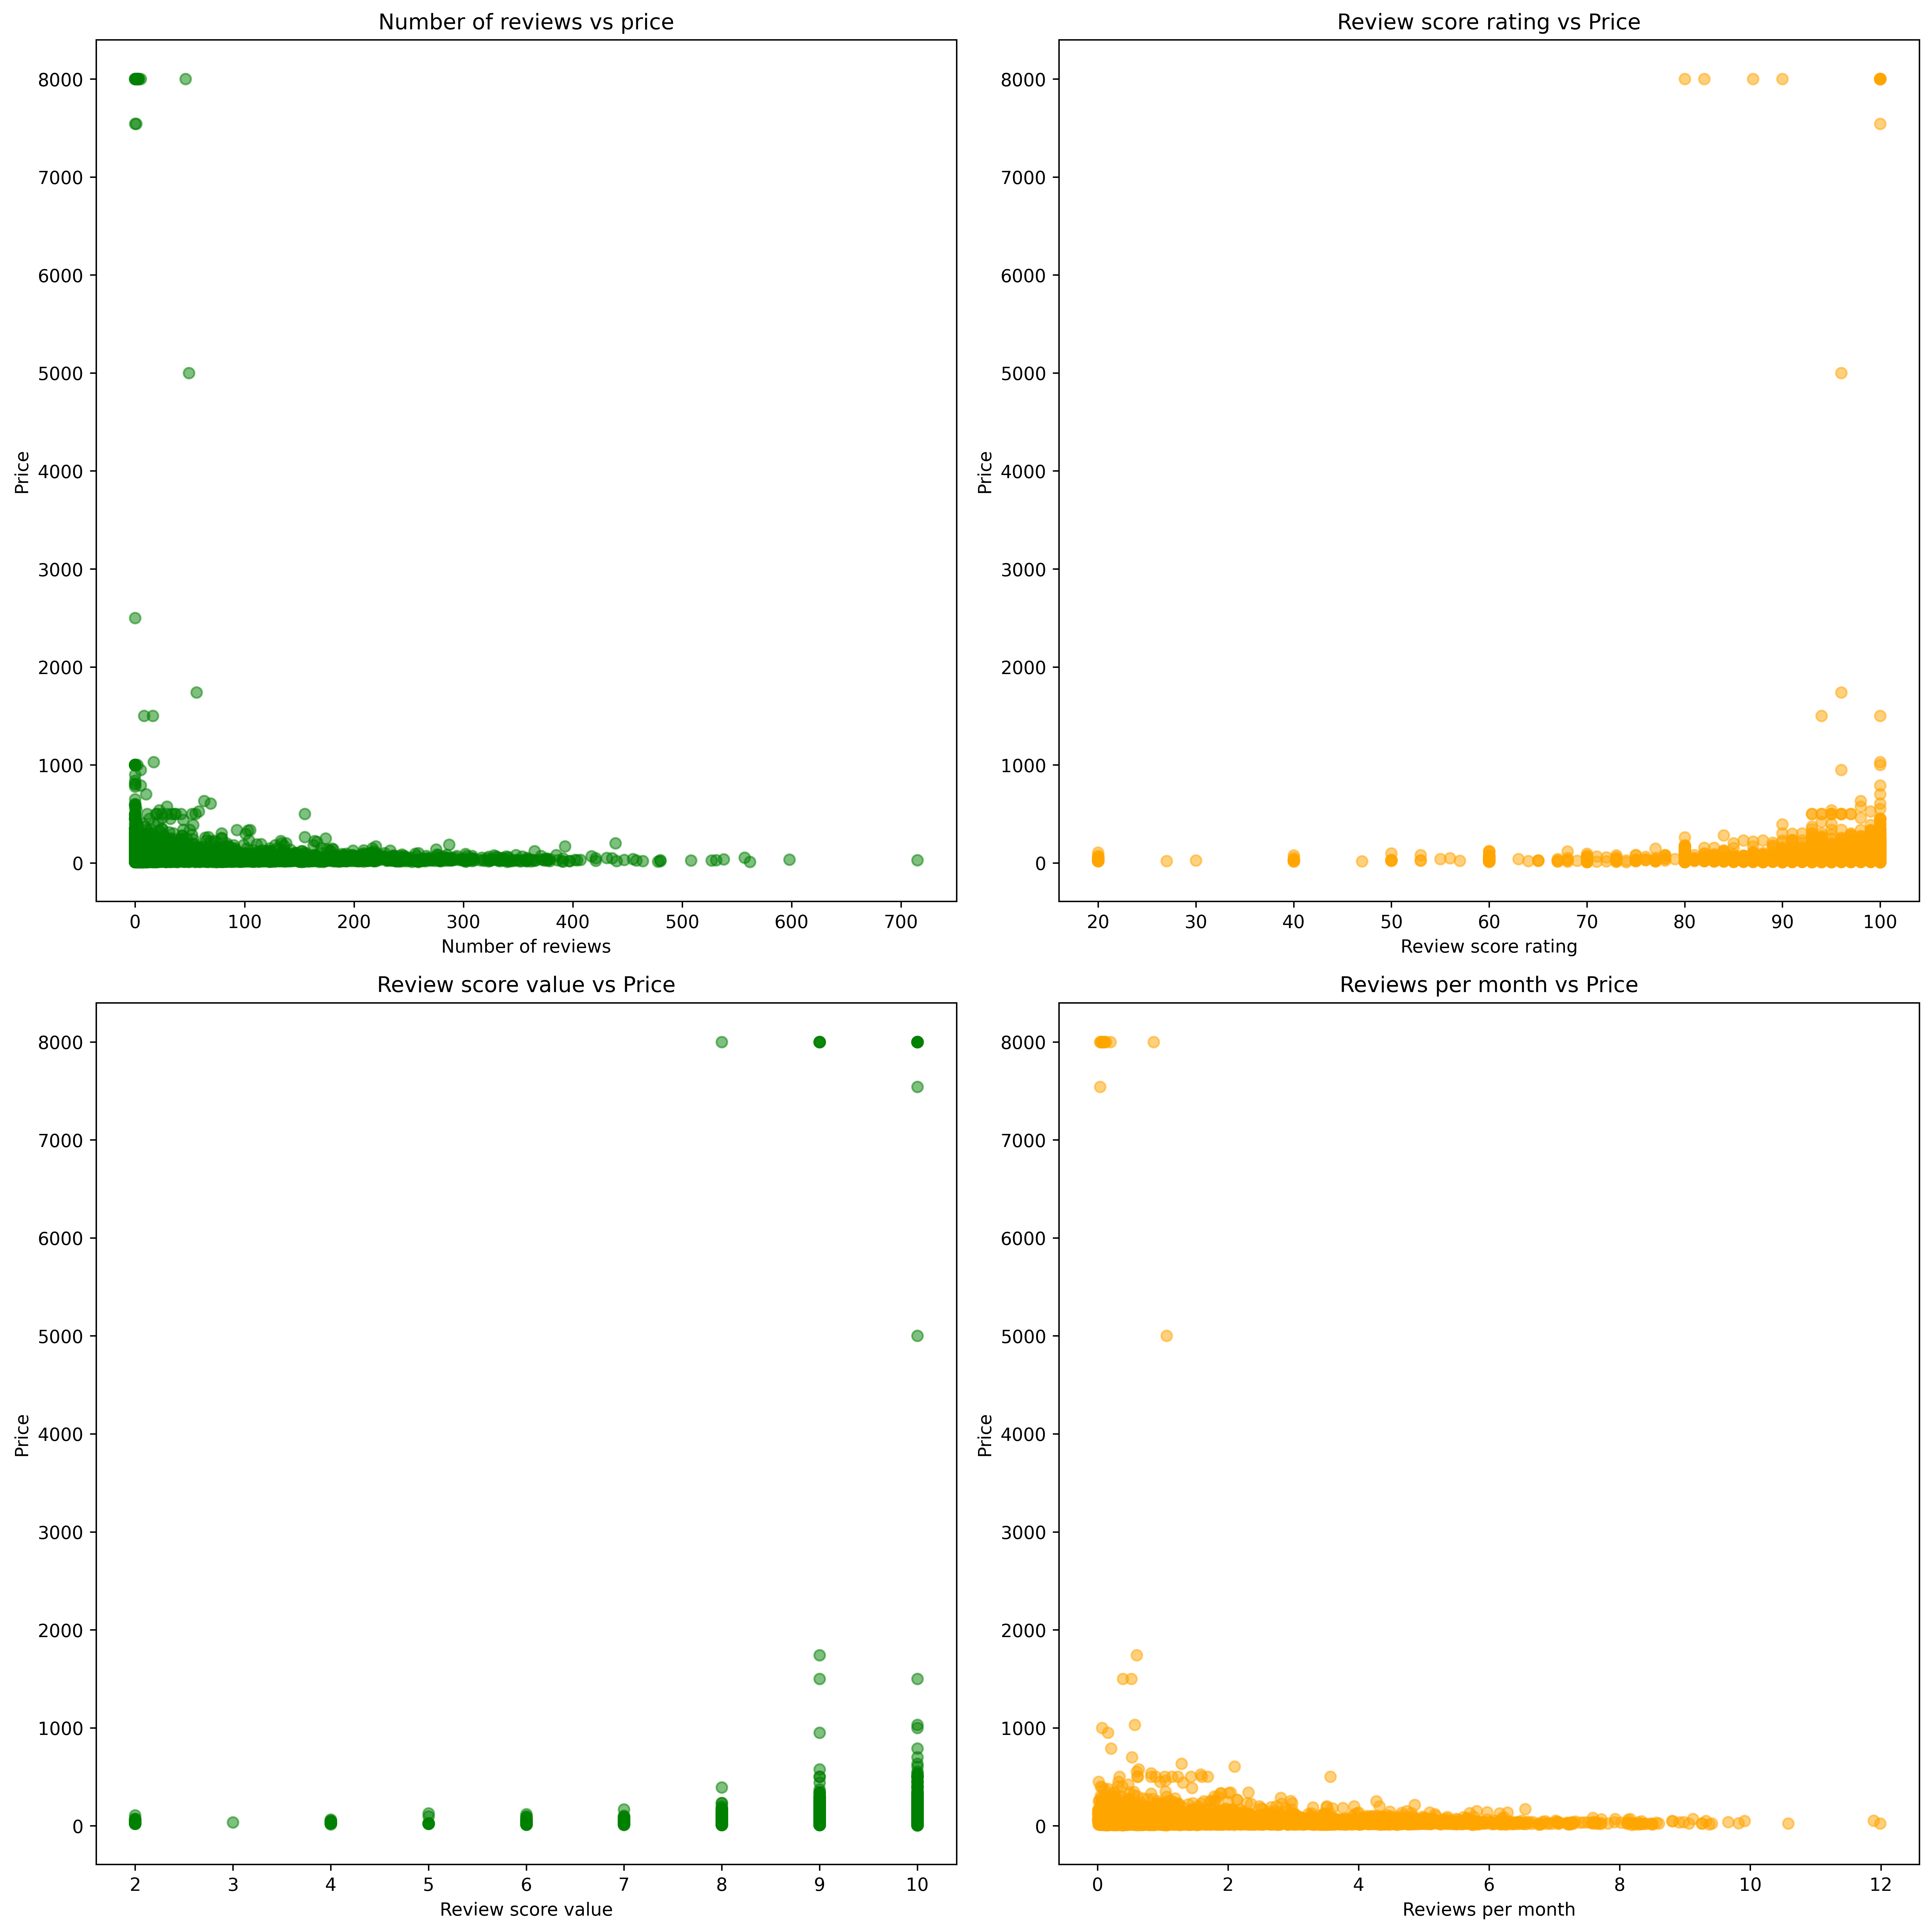

In [13]:
def plot_scatter(x,y, title, x_label, y_label, face, axes):
    
    axes.scatter(x,y,color=face,alpha=0.5)

    
    axes.set_title(title)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    
    
    
    return axes
    
#plot histograms for each marker and each demographics
#in the following, instead of adding one subplot to a 4x2 grid at a time
#I can get all the subplot axes for the grid in one line 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
plt.rcParams['figure.dpi'] = 360
ax1 = plot_scatter(df.number_of_reviews,df.price,
                'Number of reviews vs price', 
                'Number of reviews', 'Price',
                'green', 
                ax1)

ax2 = plot_scatter(df.review_scores_rating,df.price,
                'Review score rating vs Price', 
                'Review score rating', 'Price',
                'orange', 
                ax2)

ax3 = plot_scatter(df.review_scores_value,df.price,
                'Review score value vs Price', 
                'Review score value', 'Price', 
                'green', 
                ax3)

ax4 = plot_scatter(df.reviews_per_month,df.price,
                'Reviews per month vs Price', 
                'Reviews per month', 'Price',
                'orange', 
                ax4)




plt.tight_layout()
plt.show()

<BarContainer object of 4 artists>

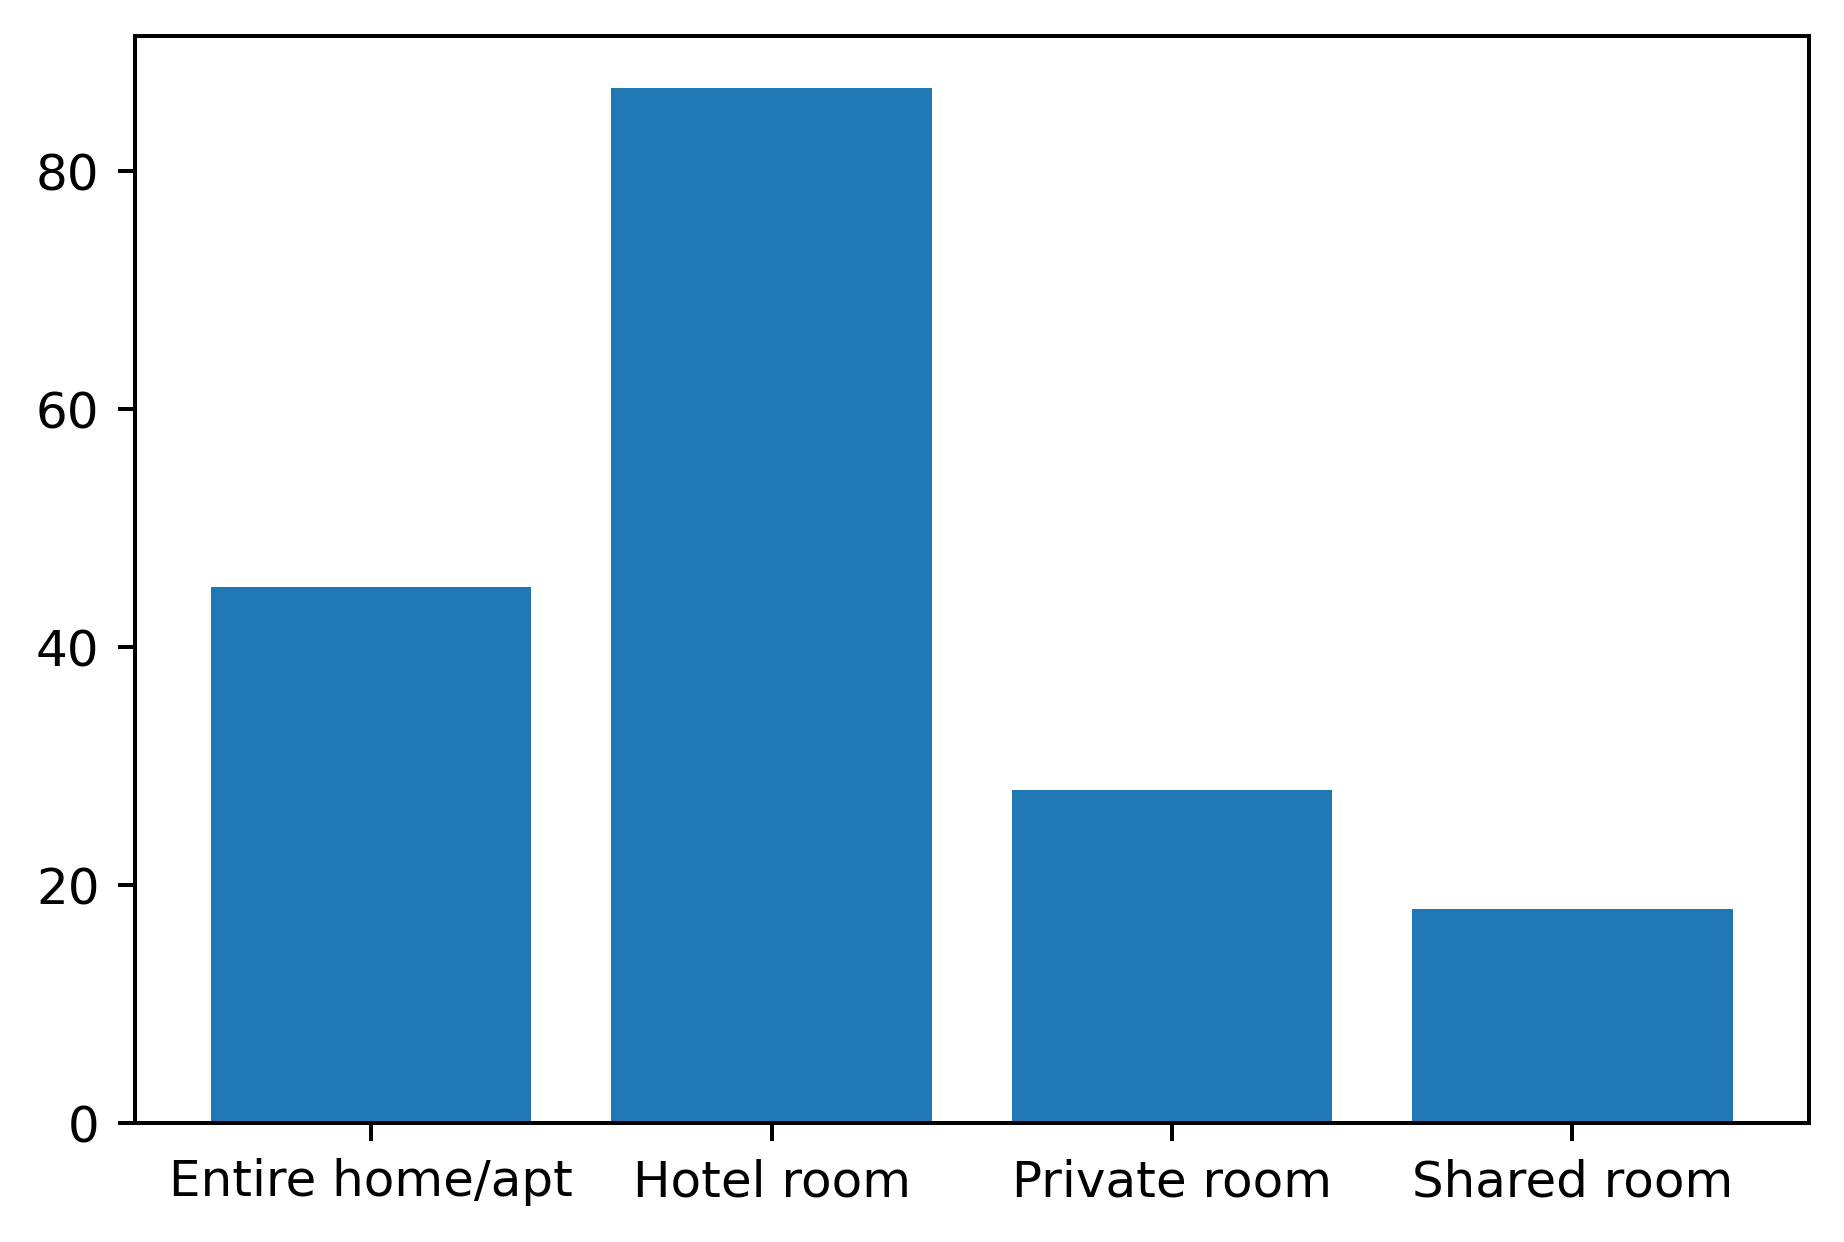

In [14]:
type_room = df.groupby('room_type').median()
categories = ['Entire home/apt','Hotel room','Private room','Shared room']
height = type_room['price']

plt.bar(categories, height)

In [15]:
df.room_type.value_counts()

Entire home/apt    8283
Private room        953
Hotel room          158
Shared room          73
Name: room_type, dtype: int64